Enter the starting point: A
The most efficient route from A is to charging station H with a total distance of 16


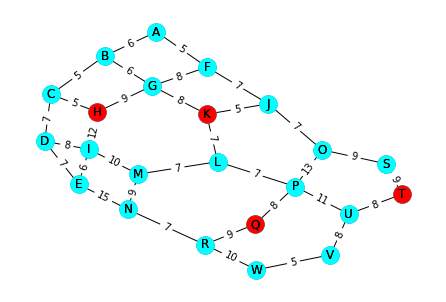

In [1]:
import heapq  # Importing heapq module for heap-based priority queue
import networkx as nx  # Importing NetworkX for graph manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for visualization

# Function to find the shortest paths from a starting node to all other nodes in a graph
def shortest_path(graph, start):
    distances = {node: float('infinity') for node in graph}  # Initialize distances with infinity
    distances[start] = 0  # Set distance to starting node as 0
    queue = [(0, start)]  # Initialize priority queue with starting node and its distance
    while queue:
        current_distance, current_node = heapq.heappop(queue)  # Get node with minimum distance
        if current_distance > distances[current_node]:
            continue  # Skip if already visited
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight  # Calculate distance to neighbor
            if distance < distances[neighbor]:
                distances[neighbor] = distance  # Update distance if shorter
                heapq.heappush(queue, (distance, neighbor))  # Add neighbor to queue
    return distances

# Function to recommend the most efficient route to a charging station
def best_route(distances, charging_stations):
    return min(charging_stations, key=lambda station: distances[station])  # Find station with minimum distance

# Defining your graph 
graph = {
    'A': {'B': 6, 'F': 5},
    'B': {'A': 6, 'C': 5, 'G': 6},
    'C': {'B': 5, 'D': 7, 'H': 5},
    'D': {'C': 7, 'E': 7, 'I': 8},
    'E': {'I': 6, 'D': 7, 'N': 15},
    'F': {'G': 8, 'A': 5, 'J': 7},
    'G': {'F': 8, 'B': 6, 'H': 9, 'K': 8},
    'H': {'G': 9, 'C': 5, 'I': 12},
    'I': {'H': 12, 'D': 8, 'M': 10, 'E': 6},
    'J': {'F': 7, 'O': 7, 'K': 5},
    'K': {'J': 5, 'G': 8, 'L': 7},
    'L': {'K': 7, 'M': 7, 'P': 7},
    'M': {'L': 7, 'N': 9, 'I': 10},
    'N': {'M': 9, 'R': 7, 'E': 15},
    'O': {'J': 7, 'S': 9, 'P': 13},
    'P': {'O': 13, 'L': 7, 'Q': 8, 'U': 9},
    'Q': {'P': 8, 'R': 9},
    'R': {'Q': 9, 'N': 7, 'W': 10},
    'S': {'O': 9, 'T': 9},
    'T': {'S': 9, 'U': 8},
    'U': {'T': 8, 'P': 11, 'V': 8},
    'V': {'U': 8, 'W': 5},
    'W': {'V': 5, 'R': 10}
}

# Defining your charging stations
charging_stations = ['H', 'K', 'Q', 'T']

# Take user input for the starting point
start = input("Enter the starting point: ")

# Find the shortest paths from the starting point to all other nodes
distances = shortest_path(graph, start)

# Recommend the most efficient route to a charging station
closest_station = best_route(distances, charging_stations)

# Print the result
print(f"The most efficient route from {start} is to charging station {closest_station} with a total distance of {distances[closest_station]}")

# Create a new graph for visualization
G = nx.Graph()

# Add edges to the graph
for node, edges in graph.items():
    for edge, weight in edges.items():
        G.add_edge(node, edge, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True)
# Draw all nodes
nx.draw_networkx_nodes(G, pos, node_color='cyan')

# Draw charging station nodes in a different color
nx.draw_networkx_nodes(G, pos, nodelist=charging_stations, node_color='red')

# Draw node labels
nx.draw_networkx_labels(G, pos)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Show the graph
plt.show()
